In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Question 1. 

Let's explore clustering models on an artificial data set with five features.

In [3]:
data1 = pd.read_csv('data/hw4data1.csv')
data1.head()
data1.shape

(100, 5)

#### a) First, guess the number of clusters we could have. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? 

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). 

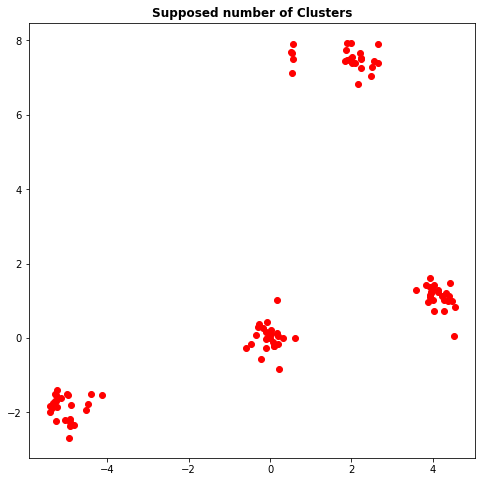

In [4]:
#Q.a #REDO WITH PCA later
d1=np.asarray(data1)
plt.figure(figsize=(8,8))
plt.scatter(d1[:,0],d1[:,1],c="r")

plt.title('Supposed number of Clusters', weight='bold')
plt.show()


# The apparent number of clusters is 4

In [5]:
#Q.b
km=KMeans(random_state=1,n_clusters=4)
res=km.fit(d1)
lab=res.labels_
print(lab)

[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


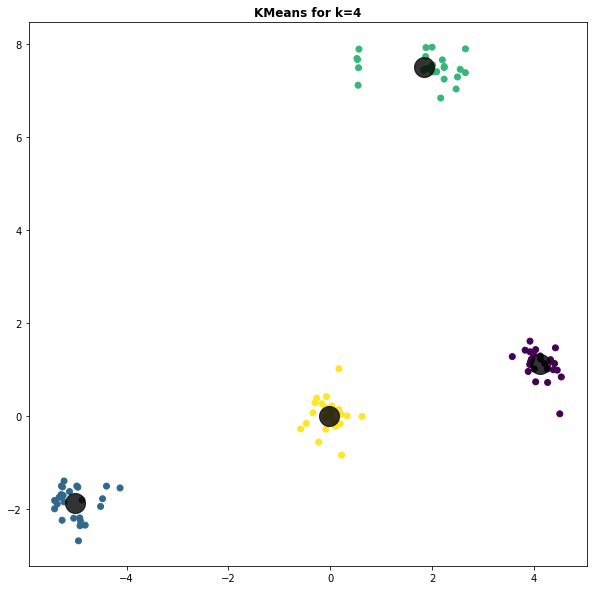

In [6]:
#Q.c
plt.figure(figsize=(10,10))
plt.scatter(d1[:,0],d1[:,1],c=lab,cmap=plt.cm.viridis)
centers=km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='o', c='black', s=400, alpha=0.8)
plt.title('KMeans for k=4', weight='bold')
plt.show()

In [7]:
#Q.d - Silhouette Score
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [3, 4, 5, 6]

for clusternumber in range_n_clusters:
    km=KMeans(n_clusters=clusternumber, random_state=2)
    cluster_labels=km.fit_predict(d1)
    silhouette=silhouette_score(d1, cluster_labels) #formula: silhouette_score(array,labels)
    print('For cluster number {}, the silhouette score is {}'.format(clusternumber, silhouette))
   

For cluster number 3, the silhouette score is 0.7215646185743501
For cluster number 4, the silhouette score is 0.8328946022248808
For cluster number 5, the silhouette score is 0.76017972347716
For cluster number 6, the silhouette score is 0.6057048565983849


# The highest silhouette score is achieved for cluster k=4

In [8]:
#Q.d - Elbow Method

from scipy.spatial.distance import cdist,pdist

from sklearn.cluster import KMeans

def elbow(data,K):
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    centroids = [k.cluster_centers_ for k in KM]

    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering', fontweight='bold', fontsize=13)
    plt.show()
    
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering', fontweight='bold', fontsize=13)
    plt.show()


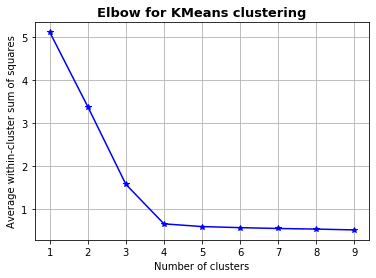

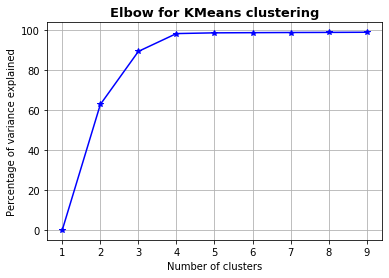

In [9]:
elbow(d1,range(1,10))

# Using the Elbow method, it seems that the optimal k is k=4, which is consistent with the silhouette method

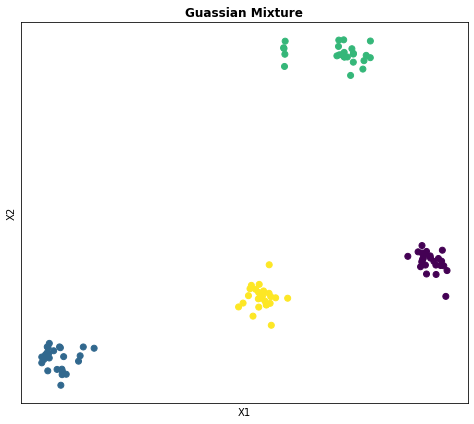

In [10]:
#Q.e: Gaussian Mixture method

from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=4, random_state=2)
res1=gm.fit(d1)


plt.figure(figsize=(8,7))
plt.subplot(1,1,1)
plt.scatter(d1[:,0],d1[:,1],c=res1.predict(d1),cmap=plt.cm.viridis)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture", weight='bold')

plt.show()



## Question 2. 

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are over 600 unique records in the file, but you want to determine the exact number. Try k-means with 600-680 clusters applying Elbow method and analyzing Silhouette scores.

In [11]:
d2 = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
d2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results. ) Briefly explain your approach. 
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  

In [12]:
#Q.a

from sklearn.preprocessing import OrdinalEncoder

df = d2.applymap(str)

enc = OrdinalEncoder() 

enc.fit(df)
OE = enc.transform(df)
OE.shape

(680, 29)

In [13]:
OE

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   3., ...,   0.,   0.,   0.],
       ...,
       [  0., 220.,   0., ...,   2.,   0.,   0.],
       [  0., 220.,   3., ...,   0.,   0.,   0.],
       [  0., 220.,   0., ...,   2.,   0.,   0.]])

In [14]:
import sklearn
print(sklearn.__version__)

0.21.2


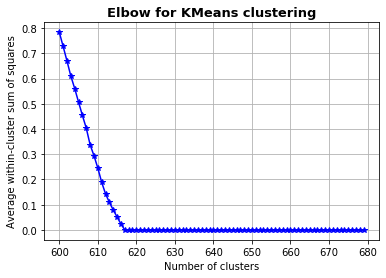

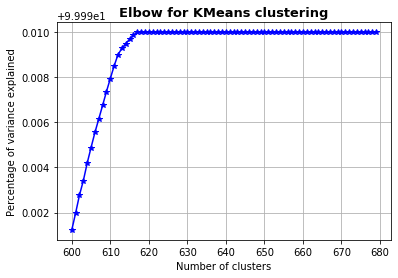

In [15]:
elbow(OE,range(600,680))

# Based on Elbow, it seems that k=617

In [16]:
D2=pd.DataFrame(OE)
D2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,293.0,333.0,293.0,216.0,0.0,0.0,...,15.0,0.0,0.0,0.0,575.0,12.0,14.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,356.0,191.0,356.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,409.0,14.0,13.0,0.0,0.0,0.0
2,0.0,0.0,3.0,28.0,384.0,448.0,384.0,286.0,71.0,0.0,...,0.0,0.0,0.0,0.0,330.0,11.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,70.0,0.0,0.0,0.0,209.0,230.0,0.0,...,15.0,0.0,0.0,0.0,31.0,11.0,7.0,0.0,0.0,0.0
4,0.0,0.0,3.0,24.0,464.0,304.0,465.0,0.0,0.0,49.0,...,15.0,3.0,0.0,0.0,36.0,14.0,13.0,2.0,0.0,0.0
5,0.0,0.0,4.0,105.0,416.0,14.0,416.0,210.0,42.0,0.0,...,15.0,0.0,0.0,0.0,309.0,14.0,13.0,0.0,0.0,0.0
6,0.0,0.0,4.0,116.0,0.0,0.0,0.0,229.0,48.0,0.0,...,0.0,0.0,0.0,0.0,93.0,11.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,41.0,482.0,262.0,483.0,275.0,122.0,0.0,...,15.0,0.0,0.0,0.0,374.0,11.0,14.0,0.0,0.0,0.0
8,0.0,0.0,2.0,78.0,179.0,434.0,179.0,132.0,88.0,0.0,...,15.0,0.0,0.0,0.0,612.0,11.0,13.0,0.0,0.0,0.0
9,0.0,0.0,2.0,74.0,247.0,288.0,247.0,0.0,0.0,90.0,...,0.0,0.0,0.0,0.0,265.0,6.0,13.0,0.0,0.0,0.0


In [17]:
D2.drop_duplicates().shape

(617, 29)

# This confirms the results obtained in Elbow. K=617

## Question 3.

### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [18]:
#load the data
d3=pd.read_csv("data/stop_2012.csv", index_col='zipcode')
d3.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [19]:
d3.shape

(183, 25)

In [20]:
#considering only the in-day timeline 
d3=d3.iloc[:,-6:]
d3.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#### a) Find and visualize 5 zip codes with most stops

#### b) Filter the data to have at least 30 stop&frisk observations per zip code

#### c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k. 

#### d) Visualize the k-means clustering for the k you've chosen

#### e) Repeat d) using Guassian Mixture model

In [21]:
#Q.a
d4=d3.copy()
d4['Totals']= d4.sum(axis=1)
d4.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Totals
zipcode,,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0,1747.0
10037,271.0,38.0,32.0,143.0,248.0,448.0,1180.0
10460,462.0,51.0,56.0,190.0,411.0,483.0,1653.0
11224,157.0,27.0,37.0,97.0,282.0,575.0,1175.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0


In [22]:
d5=d4.nlargest(5,['Totals'])

In [23]:
d5.reset_index(inplace=True)
#inplace=True save that operation in original copy

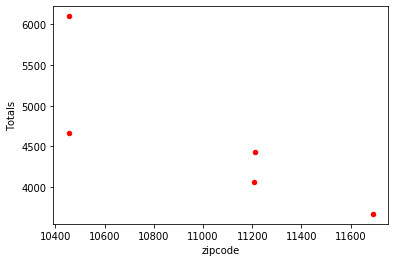

In [24]:
d5.plot.scatter(x='zipcode',y='Totals', c='r')
plt.show()

In [25]:
#Q.b
d4=d4.loc[d4.Totals>30]
d4.sort_values(by='Totals', ascending=True)
d4.reset_index(inplace=True)

In [26]:
d4.describe()

,zipcode,time_1,time_2,time_3,time_4,time_5,time_6,Totals
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,10812.600000,160.941935,18.516129,34.232258,105.283871,182.529032,292.296774,793.800000
std,570.747455,219.892011,21.041812,38.271725,132.925267,262.913973,417.476046,1066.069522
min,10001.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,32.000000
25%,10303.500000,20.500000,5.000000,7.000000,20.500000,24.500000,32.000000,122.500000
50%,11201.000000,61.000000,10.000000,17.000000,49.000000,59.000000,101.000000,306.000000
75%,11355.500000,210.500000,27.000000,51.000000,141.000000,248.500000,358.500000,1052.000000
max,11694.000000,1295.000000,137.000000,212.000000,709.000000,1553.000000,2340.000000,6097.000000


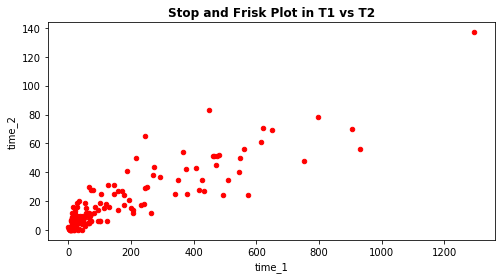

In [27]:
#Q.c

d4.plot.scatter(x='time_1',y='time_2', c='r',figsize=(8,4))
plt.title('Stop and Frisk Plot in T1 vs T2', weight='bold')
plt.show()

In [28]:
km=KMeans(n_clusters=3, random_state=648)
km.fit(d4) #performs kmeans
lab=km.labels_

centers=km.cluster_centers_
centers


array([[1.06776667e+04, 5.69259259e+02, 5.18148148e+01, 9.43333333e+01,
        3.28925926e+02, 6.49851852e+02, 1.05851852e+03, 2.75270370e+03],
       [1.13188919e+04, 6.32972973e+01, 1.09594595e+01, 1.99594595e+01,
        5.57297297e+01, 7.94864865e+01, 1.23364865e+02, 3.52797297e+02],
       [1.01862593e+04, 9.05925926e+01, 1.22222222e+01, 2.37407407e+01,
        6.13703704e+01, 9.00740741e+01, 1.40685185e+02, 4.18685185e+02]])

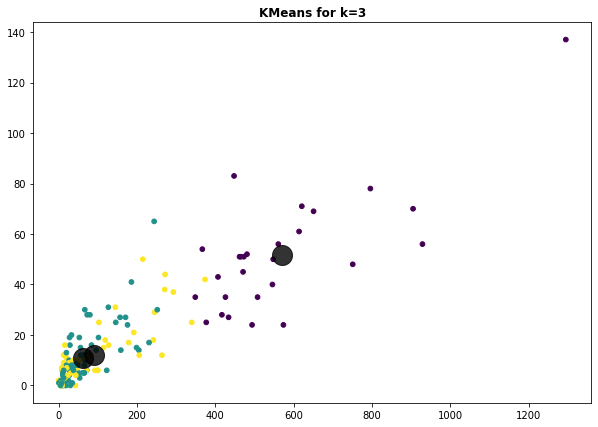

In [29]:
plt.clf

plt.figure(figsize=(10,7))
plt.scatter(d4.loc[:,'time_1'],d4.loc[:,'time_2'], c = lab, s= 22, cmap = 'viridis')
plt.scatter(centers[:,1], centers[:,2], marker='o', c='black', s=400, alpha=0.8)
plt.title('KMeans for k=3', weight='bold')
plt.show()

In [30]:
for clustern in range(2,d4.shape[0]):
    km=KMeans(n_clusters=clustern, random_state=123)
    clusterlabels=km.fit_predict(d4) #calculates cluster centroids
    silhouette=silhouette_score(d4, clusterlabels)
    if silhouette>0.55:
        print('For cluster number {}'.format(clustern) + ', the silhouette score is: {}'.format(silhouette))

For cluster number 2, the silhouette score is: 0.6182581339702687
For cluster number 3, the silhouette score is: 0.5553195404479485
For cluster number 4, the silhouette score is: 0.5947465585518876
For cluster number 5, the silhouette score is: 0.5792956157711872
For cluster number 6, the silhouette score is: 0.5877779379523641
For cluster number 7, the silhouette score is: 0.5720829843456501
For cluster number 8, the silhouette score is: 0.5785701934376043
For cluster number 9, the silhouette score is: 0.5751872591841288


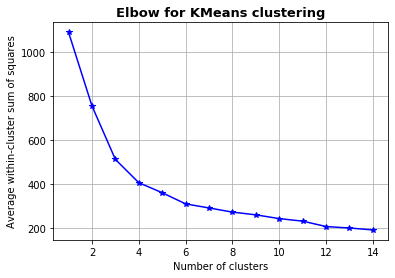

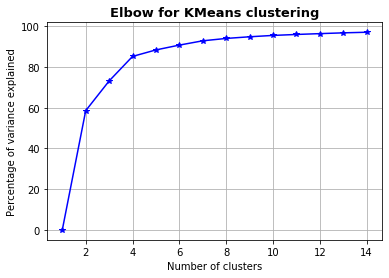

In [31]:
elbow(d4,range(1,int(d4.shape[0]/10)))

# The range of the values from the dataset fall between 0 to 1295, so I assumed that the clusters might fall into 3 different categories like 0-400 and so on. Therefore, I considered my k to be 3.

In [32]:
#KMeans with k=2
km2=KMeans(n_clusters=2, random_state=648)
km2.fit(d4) #performs kmeans
lab2=km2.labels_
lab2

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

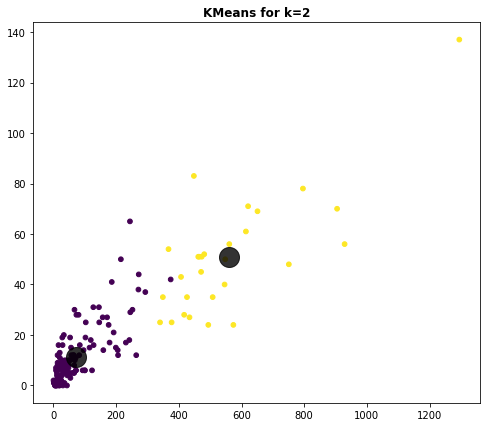

In [33]:
plt.clf
centers2=km2.cluster_centers_
plt.figure(figsize=(8,7))
plt.scatter(d4.loc[:,'time_1'],d4.loc[:,'time_2'], c = lab2, s= 22, cmap = 'viridis')
plt.scatter(centers2[:,1], centers2[:,2], marker='o', c='black', s=400, alpha=0.8)
plt.title('KMeans for k=2', weight='bold')

plt.show()

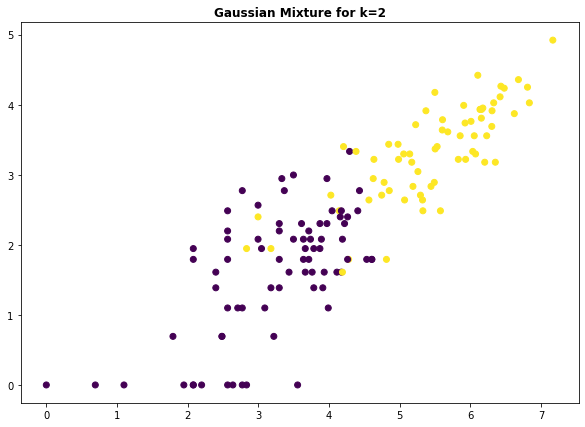

In [35]:
#Q.e: Gaussian Mixture for k=2
gm=GaussianMixture(n_components=2, random_state=22)
gmf=gm.fit(d4)

plt.figure(figsize=(10,7))
plt.scatter(np.log(d4.loc[:,'time_1']),np.log(d4.loc[:,'time_2']),c=gmf.predict(d4), cmap=plt.cm.viridis)
plt.title('Gaussian Mixture for k=2', weight='bold')
plt.show()